<a href="https://colab.research.google.com/github/Aaditya97735/Aaditya97735/blob/main/Movie_DA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# STEP 2: Load datasets
movies = pd.read_csv('/mnt/data/movie.csv')
tags = pd.read_csv('/mnt/data/tag.csv')
genome_tags = pd.read_csv('/mnt/data/genome_tags.csv')
genome_scores = pd.read_csv('/mnt/data/genome_scores.csv')
links = pd.read_csv('/mnt/data/link.csv')

# Optional: If you have ratings.csv, load it as well
try:
    ratings = pd.read_csv('/mnt/data/rating.csv')
except:
    ratings = None
    print("rating.csv not found – some analyses may be skipped.")

# STEP 3: Quick summary
print("Movies shape:", movies.shape)
print("Tags shape:", tags.shape)
print("Genome Tags shape:", genome_tags.shape)
print("Genome Scores shape:", genome_scores.shape)
print("Links shape:", links.shape)

# STEP 4: Check for nulls
for df_name, df in zip(['Movies', 'Tags', 'Genome Tags', 'Genome Scores', 'Links'],
                       [movies, tags, genome_tags, genome_scores, links]):
    print(f"\n{df_name} null values:\n", df.isnull().sum())

# STEP 5: Top tagged movies
top_tags = tags.groupby('movieId').count()['tag'].sort_values(ascending=False).head(10)
top_movies = movies[movies['movieId'].isin(top_tags.index)][['movieId', 'title']]
top_movies = top_movies.set_index('movieId').join(top_tags.rename("tag_count"))
print("\nTop 10 Most Tagged Movies:\n", top_movies)

# STEP 6: Most common user tags
most_common_tags = tags['tag'].value_counts().head(10)
print("\nMost Common Tags:\n", most_common_tags)

# STEP 7: Top genome tags
top_genome_tags = genome_scores.groupby('tagId')['relevance'].mean().sort_values(ascending=False).head(10)
top_genome_tags = top_genome_tags.reset_index().merge(genome_tags, on='tagId')
print("\nTop Genome Tags by Avg Relevance:\n", top_genome_tags[['tag', 'relevance']])

# STEP 8: Tag cloud per movie (optional)
movie_id = 1  # Toy Story (1995)
tags_for_movie = tags[tags['movieId'] == movie_id]
print(f"\nTags for Movie ID {movie_id}:", tags_for_movie['tag'].unique())

# STEP 9: Merge genome tags and scores for specific movie
toy_story_tags = genome_scores[genome_scores['movieId'] == movie_id].merge(genome_tags, on='tagId')
top_toy_story_tags = toy_story_tags.sort_values('relevance', ascending=False).head(10)
print(f"\nTop Genome Tags for Toy Story:\n", top_toy_story_tags[['tag', 'relevance']])

# STEP 10: Link IMDb/RottenTomatoes (optional mapping)
print("\nSample links:\n", links.head())

# ADVANCED: If ratings.csv is available
if ratings is not None:
    # Merge ratings and movies
    movie_ratings = pd.merge(ratings, movies, on='movieId')

    # Top rated movies with at least 100 ratings
    movie_stats = movie_ratings.groupby('title')['rating'].agg(['mean', 'count'])
    top_movies = movie_stats[movie_stats['count'] >= 100].sort_values('mean', ascending=False).head(10)
    print("\nTop 10 Movies with Most Ratings (min 100):\n", top_movies)

    # Rating distribution
    plt.figure(figsize=(8, 4))
    sns.histplot(ratings['rating'], bins=10, kde=True)
    plt.title("Rating Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.show()

    # Ratings over time
    ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
    ratings['year'] = ratings['timestamp'].dt.year
    ratings_by_year = ratings.groupby('year')['rating'].mean()
    ratings_by_year.plot(title="Average Rating Over Time", figsize=(8, 4))
    plt.ylabel("Avg Rating")
    plt.show()

# BONUS: Genre analysis
movies['genres'] = movies['genres'].str.split('|')
genre_df = movies.explode('genres')
genre_counts = genre_df['genres'].value_counts()
genre_counts.plot(kind='bar', title='Genre Distribution', figsize=(10, 4))
plt.ylabel("Number of Movies")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/movie.csv'

In [ ]:
# STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# STEP 2: Load datasets (make sure paths are correct in Google Colab)
movies = pd.read_csv('/mnt/data/movie.csv')
tags = pd.read_csv('/mnt/data/tag.csv')
genome_tags = pd.read_csv('/mnt/data/genome_tags.csv')
genome_scores = pd.read_csv('/mnt/data/genome_scores.csv')
links = pd.read_csv('/mnt/data/link.csv')

# STEP 3: Basic info and null check
print("Movies:", movies.shape)
print("Tags:", tags.shape)
print("Genome Tags:", genome_tags.shape)
print("Genome Scores:", genome_scores.shape)
print("Links:", links.shape)

# Null value check
datasets = {'Movies': movies, 'Tags': tags, 'Genome Tags': genome_tags, 'Genome Scores': genome_scores, 'Links': links}
for name, df in datasets.items():
    print(f"\n{name} null values:\n{df.isnull().sum()}")

# STEP 4: Most tagged movies
tag_counts = tags['movieId'].value_counts().head(10)
top_tagged_movies = movies[movies['movieId'].isin(tag_counts.index)]
top_tagged_movies['tag_count'] = top_tagged_movies['movieId'].map(tag_counts)
print("\nTop 10 Tagged Movies:\n", top_tagged_movies[['title', 'tag_count']])

# STEP 5: Most common user tags
most_common_tags = tags['tag'].value_counts().head(10)
print("\nMost Common User Tags:\n", most_common_tags)

# STEP 6: Top genome tags by average relevance
avg_relevance = genome_scores.groupby('tagId')['relevance'].mean().reset_index()
avg_relevance = avg_relevance.merge(genome_tags, on='tagId')
top_genome_tags = avg_relevance.sort_values('relevance', ascending=False).head(10)
print("\nTop Genome Tags by Relevance:\n", top_genome_tags[['tagId', 'tag', 'relevance']])

# STEP 7: Genre distribution
movies['genres'] = movies['genres'].str.split('|')
genre_df = movies.explode('genres')
genre_counts = genre_df['genres'].value_counts()
genre_counts.plot(kind='bar', figsize=(10, 4), title='Genre Distribution')
plt.ylabel("Number of Movies")
plt.show()

# STEP 8: Example tag relevance for Toy Story
movie_id = 1  # Toy Story (1995)
toy_story_scores = genome_scores[genome_scores['movieId'] == movie_id].merge(genome_tags, on='tagId')
top_toy_story = toy_story_scores.sort_values('relevance', ascending=False).head(10)
print("\nTop Tags for Toy Story (1995):\n", top_toy_story[['tag', 'relevance']])


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/movie.csv'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving genome_scores.csv to genome_scores.csv
Saving genome_tags.csv to genome_tags.csv
Saving link.csv to link.csv
Saving movie.csv to movie.csv
Saving rating.csv to rating.csv
Saving tag.csv to tag.csv


In [ ]:
import pandas as pd
movies = pd.read_csv('movie.csv')
tags = pd.read_csv('tag.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_scores = pd.read_csv('genome_scores.csv')
links = pd.read_csv('link.csv')




Movies shape: (27278, 3)
Movies nulls:
movieId    0
title      0
genres     0
dtype: int64

Tags shape: (465564, 4)
Tags nulls:
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Genome Tags shape: (1128, 2)
Genome Tags nulls:
tagId    0
tag      0
dtype: int64

Genome Scores shape: (11709768, 3)
Genome Scores nulls:
movieId      0
tagId        0
relevance    0
dtype: int64

Links shape: (27278, 3)
Links nulls:
movieId      0
imdbId       0
tmdbId     252
dtype: int64

Top 10 Tagged Movies:
                                               title  tag_count
293                             Pulp Fiction (1994)       1994
315                Shawshank Redemption, The (1994)       1339
587                Silence of the Lambs, The (1991)       1100
2486                             Matrix, The (1999)       1430
2873                              Fight Club (1999)       1779
4132                                 Memento (2000)       1168
4782                            Do

<ipython-input-4-251f931ee592>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_movies['tag_count'] = top_movies['movieId'].map(top_tags)



Top Genome Tags:
      tagId  relevance              tag
741    742   0.730527         original
645    646   0.530233           mentor
467    468   0.499534     great ending
301    302   0.490878         dialogue
451    452   0.455614  good soundtrack
187    188   0.450997      catastrophe
971    972   0.448479     storytelling
970    971   0.427058            story
463    464   0.426717            great
444    445   0.424800             good


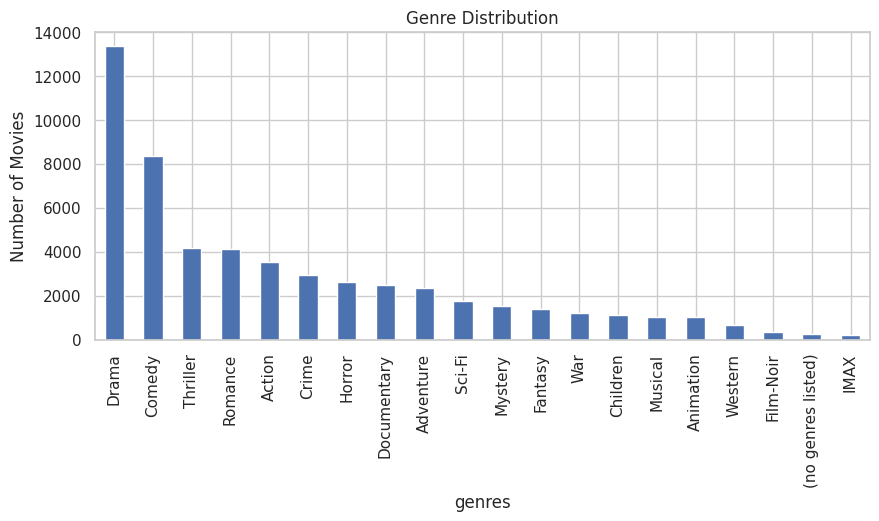


Top Tags for Toy Story:
                      tag  relevance
1035                toys    0.99925
243   computer animation    0.99850
785      pixar animation    0.99600
588      kids and family    0.99075
63             animation    0.98575
587                 kids    0.97925
784                pixar    0.96675
203             children    0.96425
185              cartoon    0.95650
535         imdb top 250    0.94200


In [ ]:

# STEP 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# STEP 3: Load datasets
movies = pd.read_csv('movie.csv')
tags = pd.read_csv('tag.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_scores = pd.read_csv('genome_scores.csv')
links = pd.read_csv('link.csv')

# STEP 4: Quick summary
datasets = {'Movies': movies, 'Tags': tags, 'Genome Tags': genome_tags, 'Genome Scores': genome_scores, 'Links': links}
for name, df in datasets.items():
    print(f"\n{name} shape: {df.shape}")
    print(f"{name} nulls:\n{df.isnull().sum()}")

# STEP 5: Most tagged movies
top_tags = tags['movieId'].value_counts().head(10)
top_movies = movies[movies['movieId'].isin(top_tags.index)]
top_movies['tag_count'] = top_movies['movieId'].map(top_tags)
print("\nTop 10 Tagged Movies:\n", top_movies[['title', 'tag_count']])

# STEP 6: Most common user tags
print("\nMost Common Tags:\n", tags['tag'].value_counts().head(10))

# STEP 7: Top genome tags
avg_relevance = genome_scores.groupby('tagId')['relevance'].mean().reset_index()
avg_relevance = avg_relevance.merge(genome_tags, on='tagId')
print("\nTop Genome Tags:\n", avg_relevance.sort_values('relevance', ascending=False).head(10))

# STEP 8: Genre distribution
movies['genres'] = movies['genres'].str.split('|')
genre_df = movies.explode('genres')
genre_counts = genre_df['genres'].value_counts()
genre_counts.plot(kind='bar', figsize=(10, 4), title='Genre Distribution')
plt.ylabel("Number of Movies")
plt.show()

# STEP 9: Genome tags for Toy Story
toy_story_tags = genome_scores[genome_scores['movieId'] == 1].merge(genome_tags, on='tagId')
top_tags = toy_story_tags.sort_values('relevance', ascending=False).head(10)
print("\nTop Tags for Toy Story:\n", top_tags[['tag', 'relevance']])


In [ ]:
def get_similar_movies_by_tags(target_movie_id, top_n=5):
    # Get genome vector for target movie
    target_vec = genome_scores[genome_scores['movieId'] == target_movie_id][['tagId', 'relevance']]
    all_movies = genome_scores.merge(genome_tags, on='tagId')

    similarities = []
    for mid in genome_scores['movieId'].unique():
        if mid == target_movie_id:
            continue
        movie_vec = genome_scores[genome_scores['movieId'] == mid][['tagId', 'relevance']]
        merged = pd.merge(target_vec, movie_vec, on='tagId')
        if not merged.empty:
            sim = merged['relevance_x'].dot(merged['relevance_y']) / (
                (merged['relevance_x']**2).sum()**0.5 * (merged['relevance_y']**2).sum()**0.5
            )
            similarities.append((mid, sim))

    top_matches = sorted(similarities, key=lambda x: x[1], reverse=True)[:top_n]
    return movies[movies['movieId'].isin([m[0] for m in top_matches])][['title']]

# Example: Recommend similar movies to Toy Story
get_similar_movies_by_tags(1)


,title
2270,"Bug's Life, A (1998)"
3027,Toy Story 2 (1999)
4790,"Monsters, Inc. (2001)"
6271,Finding Nemo (2003)
15401,Toy Story 3 (2010)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# Convert genre lists into a string
movies['genres_str'] = movies['genres'].apply(lambda x: ' '.join(x))

# Vectorize genre text
vectorizer = CountVectorizer()
genre_matrix = vectorizer.fit_transform(movies['genres_str'])

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
movies['cluster'] = kmeans.fit_predict(genre_matrix)

# Sample movies from each cluster
for i in range(5):
    print(f"\nCluster {i} Movies:\n", movies[movies['cluster'] == i][['title', 'genres']].head(5))



Cluster 0 Movies:
                   title                                     genres
5           Heat (1995)                  [Action, Crime, Thriller]
8   Sudden Death (1995)                                   [Action]
9      GoldenEye (1995)              [Action, Adventure, Thriller]
21       Copycat (1995)  [Crime, Drama, Horror, Mystery, Thriller]
22     Assassins (1995)                  [Action, Crime, Thriller]

Cluster 1 Movies:
                              title                        genres
2          Grumpier Old Men (1995)             [Comedy, Romance]
3         Waiting to Exhale (1995)      [Comedy, Drama, Romance]
6                   Sabrina (1995)             [Comedy, Romance]
10  American President, The (1995)      [Comedy, Drama, Romance]
14         Cutthroat Island (1995)  [Action, Adventure, Romance]

Cluster 2 Movies:
                                     title  \
0                        Toy Story (1995)   
4      Father of the Bride Part II (1995)   
11     Dracul

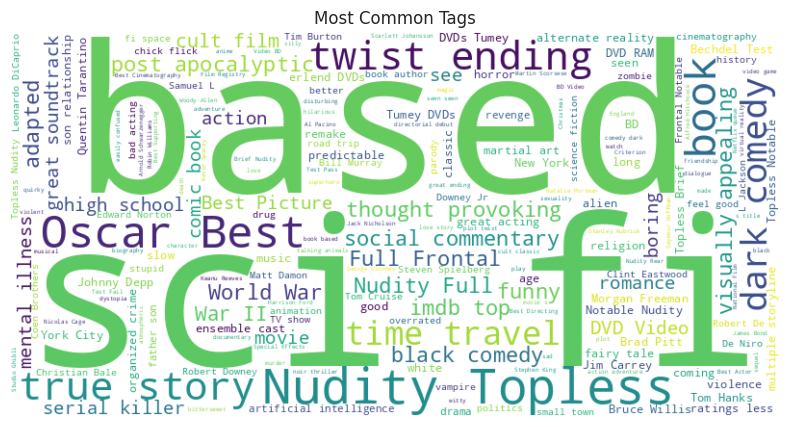

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tags into one string
all_tags = ' '.join(tags['tag'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Tags")
plt.show()


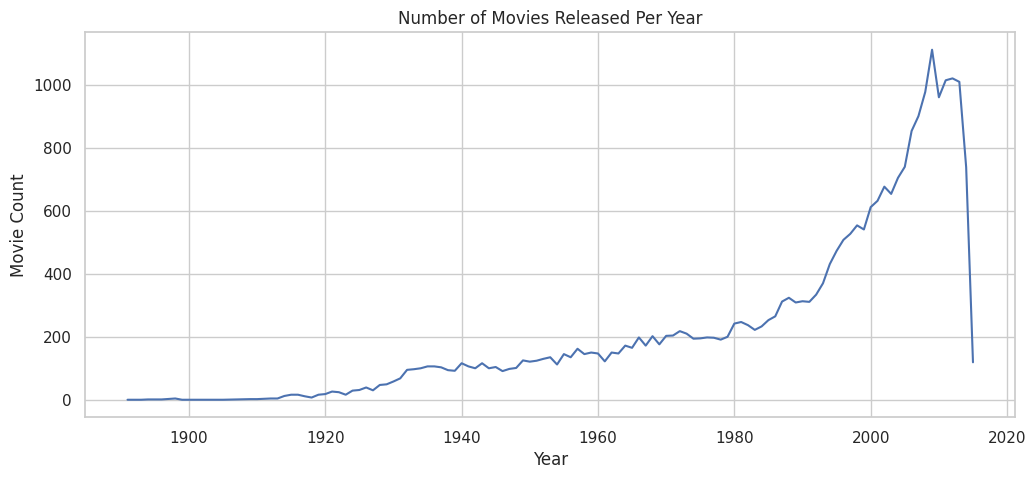

In [ ]:
import re

# Extract year from title
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')
yearly_counts = movies['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Movie Count")
plt.grid(True)
plt.show()


In [ ]:
pip install streamlit pandas matplotlib seaborn wordcloud scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity

st.set_page_config(page_title="MovieLens Dashboard", layout="wide")

# -------------------- Load Datasets --------------------
@st.cache_data
def load_data():
    movies = pd.read_csv("movie.csv")
    tags = pd.read_csv("tag.csv")
    genome_tags = pd.read_csv("genome_tags.csv")
    genome_scores = pd.read_csv("genome_scores.csv")

    # Fix genre handling
    movies['genres'] = movies['genres'].apply(lambda x: x.split('|') if isinstance(x, str) else x)
    movies['primary_genre'] = movies['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

    return movies, tags, genome_tags, genome_scores

movies, tags, genome_tags, genome_scores = load_data()

# -------------------- Sidebar --------------------
st.sidebar.title("🎬 MovieLens Navigation")
section = st.sidebar.radio("Go to", ["Overview", "Genre Distribution", "Tag Word Cloud", "Yearly Trends", "Movie Details", "Recommendation"])

# -------------------- Overview --------------------
if section == "Overview":
    st.title("📊 MovieLens Dataset Dashboard")
    st.metric("Total Movies", movies.shape[0])
    st.metric("Total Tags", tags.shape[0])
    st.metric("Unique Genome Tags", genome_tags['tag'].nunique())
    st.metric("Genome Scores Entries", genome_scores.shape[0])

# -------------------- Genre Distribution --------------------
elif section == "Genre Distribution":
    st.title("🎭 Genre Distribution")
    genre_df = movies.explode('genres')
    genre_counts = genre_df['genres'].value_counts()
    fig, ax = plt.subplots()
    sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="Set3", ax=ax)
    ax.set_xlabel("Number of Movies")
    ax.set_ylabel("Genre")
    st.pyplot(fig)

# -------------------- Tag Word Cloud --------------------
elif section == "Tag Word Cloud":
    st.title("☁️ Tag Word Cloud")
    all_tags = ' '.join(tags['tag'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    st.pyplot(fig)

# -------------------- Yearly Trends --------------------
elif section == "Yearly Trends":
    st.title("📈 Movies Released Per Year")
    movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
    movies['year'] = pd.to_numeric(movies['year'], errors='coerce')
    year_counts = movies['year'].value_counts().sort_index()
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', ax=ax)
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Movies")
    st.pyplot(fig)

# -------------------- Movie Details --------------------
elif section == "Movie Details":
    st.title("🔍 View Tags and Genome Data for a Movie")
    movie_title = st.selectbox("Select a movie", movies['title'].sort_values())
    movie_id = movies[movies['title'] == movie_title]['movieId'].values[0]

    st.subheader("Top User Tags")
    tag_data = tags[tags['movieId'] == movie_id]
    st.dataframe(tag_data[['tag', 'timestamp']].head(10))

    st.subheader("Top Genome Tags (by relevance)")
    genome_data = genome_scores[genome_scores['movieId'] == movie_id].merge(genome_tags, on='tagId')
    top_genome = genome_data.sort_values('relevance', ascending=False).head(10)
    st.dataframe(top_genome[['tag', 'relevance']])

# -------------------- Recommendation --------------------
elif section == "Recommendation":
    st.title("🎯 Movie Recommender (Tag-Based)")
    selected_movie = st.selectbox("Choose a movie", movies['title'].sort_values())
    selected_id = movies[movies['title'] == selected_movie]['movieId'].values[0]

    st.markdown("#### Top 5 Similar Movies")

    pivot = genome_scores.pivot(index='movieId', columns='tagId', values='relevance').fillna(0)

    if selected_id in pivot.index:
        similarity_matrix = cosine_similarity(pivot.loc[[selected_id]], pivot)
        similar_indices = similarity_matrix[0].argsort()[-6:][::-1]
        similar_movies_ids = pivot.iloc[similar_indices].index.tolist()
        similar_movies_ids = [mid for mid in similar_movies_ids if mid != selected_id][:5]

        recommended = movies[movies['movieId'].isin(similar_movies_ids)][['title', 'genres']]
        st.table(recommended)
    else:
        st.warning("Not enough data to recommend similar movies.")



2025-05-13 10:03:14.132 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 10:03:14.138 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-05-13 10:03:14.156 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-05-13 10:03:14.162 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 10:03:14.486 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-13 10:03:14.493 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 10:03:14.498 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running 

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity

st.set_page_config(page_title="MovieLens Dashboard", layout="wide")

# -------------------- Load Datasets --------------------
@st.cache_data
def load_data():
    movies = pd.read_csv("movie.csv")
    tags = pd.read_csv("tag.csv")
    genome_tags = pd.read_csv("genome_tags.csv")
    genome_scores = pd.read_csv("genome_scores.csv")
    return movies, tags, genome_tags, genome_scores

movies, tags, genome_tags, genome_scores = load_data()

# -------------------- Sidebar --------------------
st.sidebar.title("🎬 MovieLens Navigation")
section = st.sidebar.radio("Go to", ["Overview", "Genre Distribution", "Tag Word Cloud", "Yearly Trends", "Movie Details", "Recommendation"])

# -------------------- Overview --------------------
if section == "Overview":
    st.title("📊 MovieLens Dataset Dashboard")
    st.markdown("This dashboard provides analysis and insights from the MovieLens dataset.")
    st.metric("Total Movies", movies.shape[0])
    st.metric("Total Tags", tags.shape[0])
    st.metric("Unique Genome Tags", genome_tags['tag'].nunique())
    st.metric("Genome Scores Entries", genome_scores.shape[0])

# -------------------- Genre Distribution --------------------
elif section == "Genre Distribution":
    st.title("🎭 Genre Distribution")
    movies['genres_list'] = movies['genres'].str.split('|')
    genre_df = movies.explode('genres_list')
    genre_counts = genre_df['genres_list'].value_counts()
    fig, ax = plt.subplots()
    sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="Set3", ax=ax)
    ax.set_xlabel("Number of Movies")
    ax.set_ylabel("Genre")
    st.pyplot(fig)

# -------------------- Tag Word Cloud --------------------
elif section == "Tag Word Cloud":
    st.title("☁️ Tag Word Cloud")
    all_tags = ' '.join(tags['tag'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    st.pyplot(fig)

# -------------------- Yearly Trends --------------------
elif section == "Yearly Trends":
    st.title("📈 Movies Released Per Year")
    movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
    movies['year'] = pd.to_numeric(movies['year'], errors='coerce')
    year_counts = movies['year'].value_counts().sort_index()
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', ax=ax)
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Movies")
    st.pyplot(fig)

# -------------------- Movie Details --------------------
elif section == "Movie Details":
    st.title("🔍 View Tags and Genome Data for a Movie")
    movie_title = st.selectbox("Select a movie", movies['title'].sort_values())
    movie_id = movies[movies['title'] == movie_title]['movieId'].values[0]

    st.subheader("Top User Tags")
    tag_data = tags[tags['movieId'] == movie_id]
    st.dataframe(tag_data[['tag', 'timestamp']].head(10))

    st.subheader("Top Genome Tags (by relevance)")
    genome_data = genome_scores[genome_scores['movieId'] == movie_id].merge(genome_tags, on='tagId')
    top_genome = genome_data.sort_values('relevance', ascending=False).head(10)
    st.dataframe(top_genome[['tag', 'relevance']])

# -------------------- Recommendation --------------------
elif section == "Recommendation":
    st.title("🎯 Movie Recommender (Tag-Based)")
    selected_movie = st.selectbox("Choose a movie", movies['title'].sort_values())
    selected_id = movies[movies['title'] == selected_movie]['movieId'].values[0]

    st.markdown("#### Top 5 Similar Movies")

    # Build matrix of movies x tagId relevance
    pivot = genome_scores.pivot(index='movieId', columns='tagId', values='relevance').fillna(0)

    # Compute cosine similarity
    if selected_id in pivot.index:
        similarity_matrix = cosine_similarity(pivot.loc[[selected_id]], pivot)
        similar_indices = similarity_matrix[0].argsort()[-6:][::-1]  # Skip the movie itself
        similar_movies_ids = pivot.iloc[similar_indices].index.tolist()
        similar_movies_ids = [mid for mid in similar_movies_ids if mid != selected_id][:5]

        recommended = movies[movies['movieId'].isin(similar_movies_ids)][['title', 'genres']]
        st.table(recommended)
    else:
        st.warning("Not enough data to recommend similar movies.")


2025-05-13 10:03:53.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 10:03:53.018 No runtime found, using MemoryCacheStorageManager
2025-05-13 10:03:53.020 No runtime found, using MemoryCacheStorageManager
2025-05-13 10:03:53.021 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 10:03:53.022 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 10:03:53.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 10:03:53.527 Thread 'Thread-10': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 10:03:53.529 Thread 'Thread-10': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-13 10:03:57.979 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored